# Code to produce figure11 for Biastoch_et_al_2021

In [1]:
%matplotlib inline
import sys

import matplotlib
from   matplotlib   import pyplot     as plt
from   matplotlib   import gridspec
from   matplotlib   import colors

import netCDF4       as nc

import numpy         as np

import cmocean   as co 

import datetime  as dt  # Python standard library datetime  module
import xarray    as xr

from   pylab   import *  # used to redefine x/ytick styles

### read matlab data
import scipy.io
import h5py

import warnings
warnings.filterwarnings('ignore')

In [2]:
### function to equally space the colorbar 
def eqspace_cbar(in_cmap, in_levels):
    my_cm = mpl.cm.get_cmap(in_cmap, len(in_levels))
    my_no = mpl.colors.BoundaryNorm(in_levels, my_cm.N)
    my_ra = [in_levels[0], in_levels[-1]]
    return my_cm, my_no, my_ra

### load mean observation data for section at 53N

In [3]:
### load matlab files!
fn1 = '../data/data_figure11/53N_uvtp_interpolated_1997_09.mat'
fn2 = '../data/data_figure11/53N_obana_97to09_km.mat'

mf1 = h5py.File(fn1) #read mat file
mf2 = h5py.File(fn2) #read mat file

# print(mf1.keys())
pos2  = np.array(mf1.get('pos2'))
zc2   = np.array(mf1.get('zc2'))
dep   = zc2[0,:];
v     = np.array(mf1.get('v'))
# print(mf2.keys())
npos  = np.array(mf2.get('npos'))
sig0  = np.array(mf2.get('sth'))
npos  = npos.squeeze()
sig0msk = v * 0. +1. * sig0;

### load timeseries from VIKING20X, ORCA025 extracted along section at 53N

In [4]:
# load interannual filtered DWBC transport timeseries
f_53N   = xr.open_mfdataset('../data/data_figure11/DWBC_Transport_53N_VIKING20X_ORCA025_Observations_interannual_filtered.nc')
# load interannual filtered AMOC_on_sigma2 transport timeseries
f_53Nas = xr.open_mfdataset('../data/data_figure11/AMOC_on_sigma2_Transport_53N_VIKING20X_ORCA025_interannual_filtered.nc')

### load data from VIKING20X extracted along section at 53N

In [5]:
### load V20X-JRA-short
f_V20X_JRA_short_53N = xr.open_mfdataset('../data/data_figure11/1_VIKING20X.L46-KKG36107B_ave_19970101_20091231_53N.nc', 
                                         combine='by_coords');
time_53N_V20X_JRA_short      = (f_V20X_JRA_short_53N.time_counter);
v_norm_53N_V20X_JRA_short    = (f_V20X_JRA_short_53N.vnorm.squeeze())*100;
km_53N_V20X_JRA_short        = (f_V20X_JRA_short_53N.e1v[0,0,:].squeeze());
depth_53N_V20X_JRA_short     = (f_V20X_JRA_short_53N.deptht);
f_V20X_JRA_short_53Nsig0 = xr.open_mfdataset('../data/data_figure11/1_VIKING20X.L46-KKG36107B_ave_19970101_20091231_53N_sig0.nc', 
                                             combine='by_coords');
sig0_53N_V20X_JRA_short  = f_V20X_JRA_short_53Nsig0.vosigma0.squeeze();

### load data from ORCA025 extracted along section at 53N

In [6]:
### load O025-JRA
f_O025_JRA_53N = xr.open_mfdataset('../data/data_figure11/ORCA025.L46-KFS001-V_ave_19970101_20091231_53N.nc', 
                                        combine='by_coords');
time_53N_O025_JRA      = (f_O025_JRA_53N.time_counter);
v_norm_53N_O025_JRA    = (f_O025_JRA_53N.vnorm.squeeze())*100;
km_53N_O025_JRA        = (f_O025_JRA_53N.e1v[0,0,:].squeeze());
depth_53N_O025_JRA     = (f_O025_JRA_53N.deptht);
f_O025_JRA_53Nsig0 = xr.open_mfdataset('../data/data_figure11/ORCA025.L46-KFS001-V_ave_19970101_20091231_53N_sig0.nc', 
                                        combine='by_coords');
sig0_53N_O025_JRA      = f_O025_JRA_53Nsig0.vosigma0.squeeze();

# VJs, OJ and Observation Section + time series

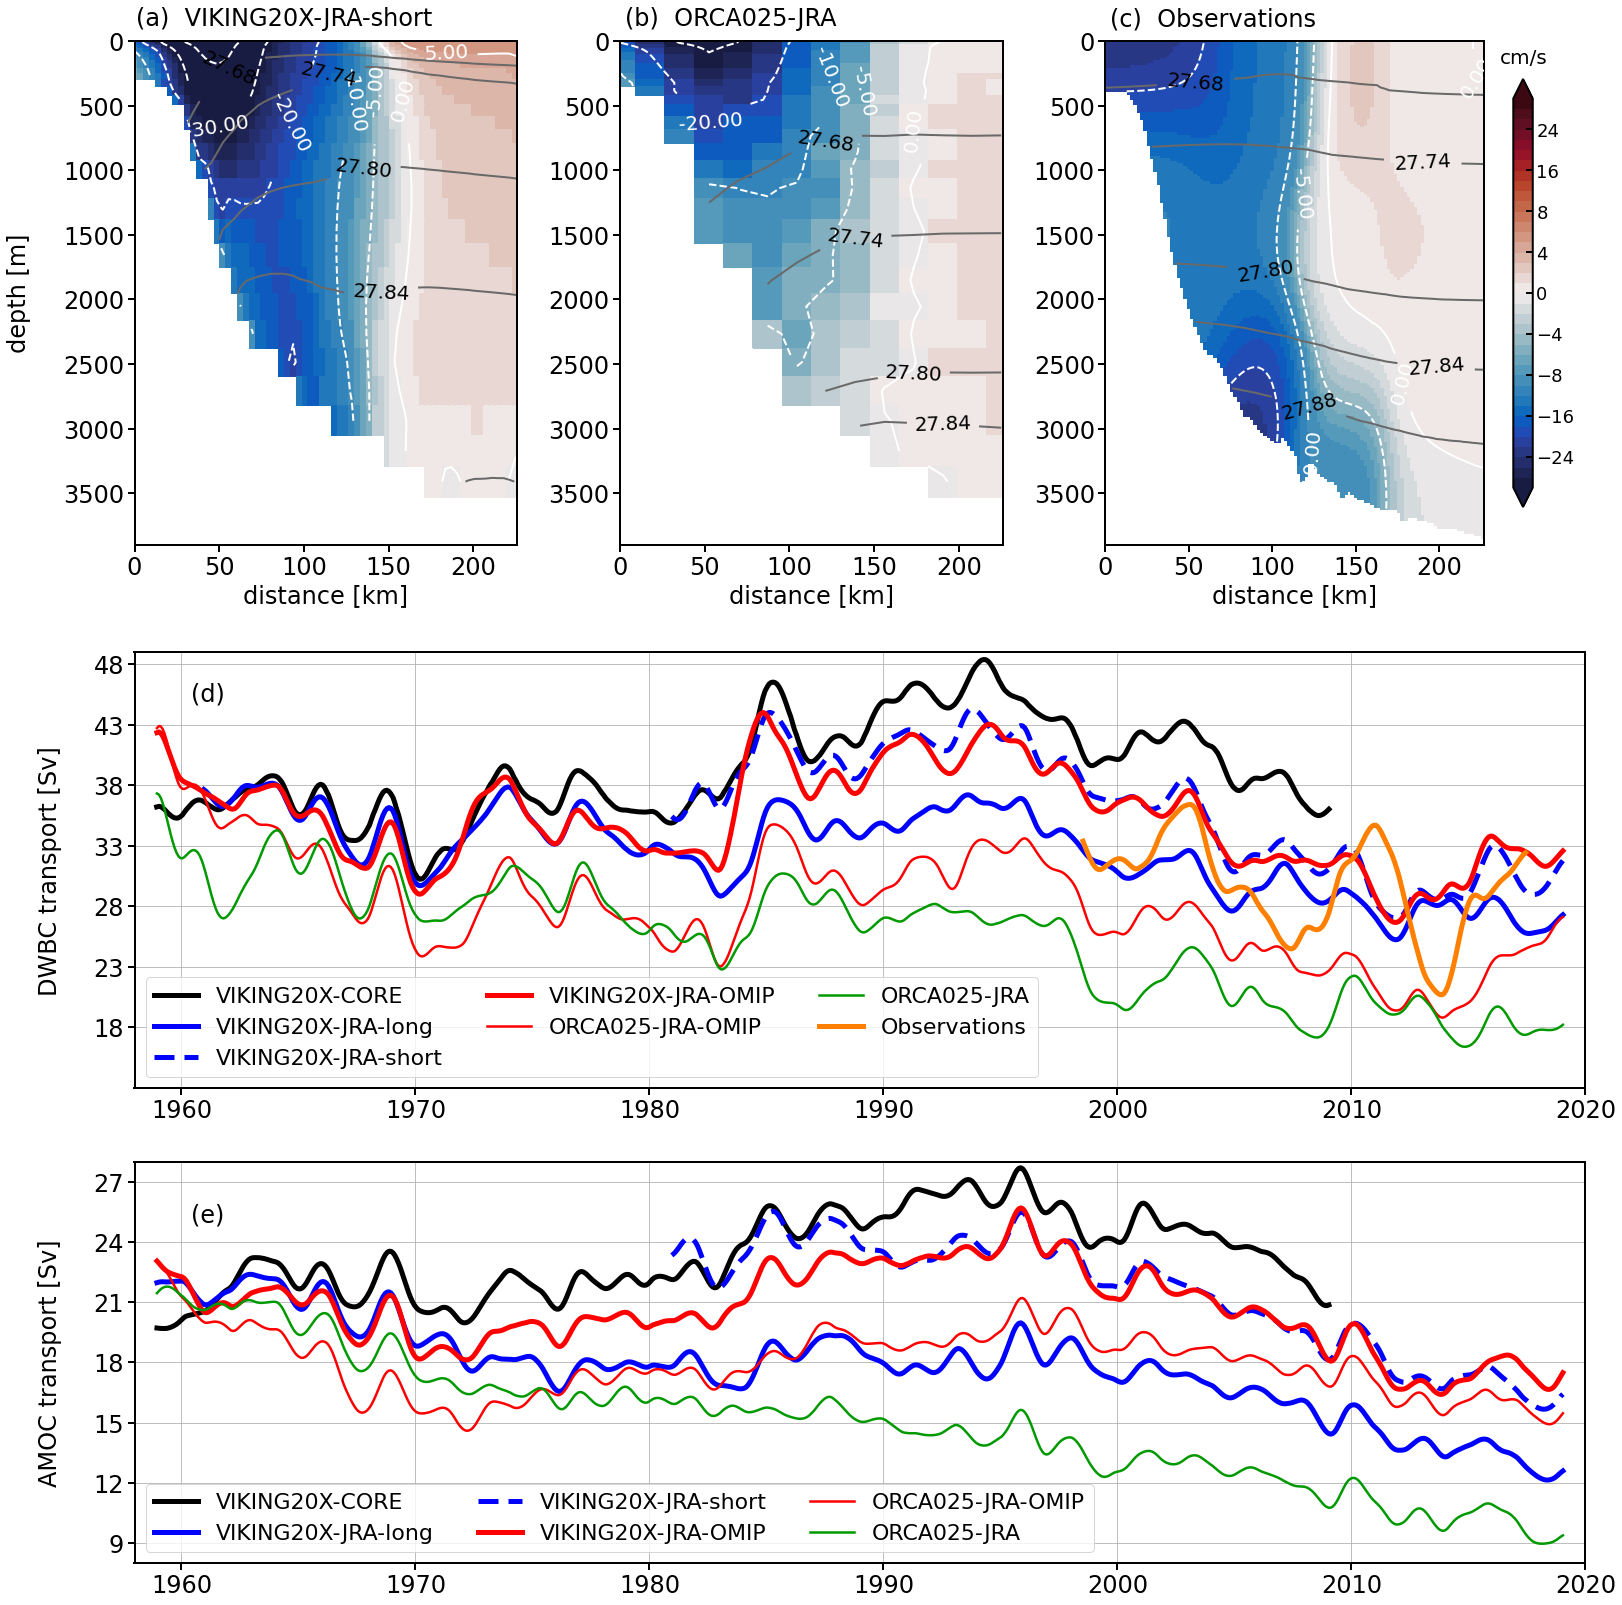

In [7]:
### https://stackoverflow.com/questions/2553521/setting-axes-linewidth-without-changing-the-rcparams-global-dict
### https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/ThickAxes.html
rc('axes', linewidth=2)
rcParams['xtick.major.width'] = 2 # 
rcParams['xtick.major.size']  = 7 # 
rcParams['ytick.major.width'] = 2 # 
rcParams['ytick.major.size']  = 7 # 

# define colors for plotting timeseries ORCA025strong and Observations
col_O025str = (0, 0.6, 0, 1);  # darkgreen
col_OBSstr  = (1., 0.5, 0, 1); # orange
# define velocity and sigma range 
vvec    = np.concatenate((np.arange( -30, -9.9, 2), np.arange(-8, 8.1, 1), np.arange( 10, 30.1, 2)))
vvecl   = np.concatenate((np.arange( -50, -9.9, 10), np.arange(-5, 5.1, 5), np.arange( 10, 50.1, 10)))
svec    = ((27.68), (27.74), (27.8), (27.84), (27.88));
# equally space colors
my_cm, my_no, my_ra = eqspace_cbar(co.cm.balance, vvec)

plt.figure(figsize=(26, 28));   gs = gridspec.GridSpec(45, 45)
###################################################################################################################
# plot mean 53N section from VIKING20X model output
ax1  = plt.subplot(gs[0:15, 0:12])
hpc1 = plt.pcolormesh((km_53N_V20X_JRA_short[156::].cumsum()-km_53N_V20X_JRA_short[0]).values/1e3, depth_53N_V20X_JRA_short, 
                      v_norm_53N_V20X_JRA_short[:,156::], shading='nearest', cmap=my_cm, norm=my_no)
hcp1 = plt.contour((km_53N_V20X_JRA_short[156::].cumsum()-km_53N_V20X_JRA_short[0]).values/1e3, depth_53N_V20X_JRA_short, 
                   v_norm_53N_V20X_JRA_short[:,156::], levels=vvecl, linewidths=2, colors='w')
hcl1 = plt.clabel(hcp1, hcp1.levels[:], fmt='%.2f', fontsize=20)
hcp1b= plt.contour((km_53N_V20X_JRA_short[156::].cumsum()-km_53N_V20X_JRA_short[0]).values/1e3, depth_53N_V20X_JRA_short, 
                   sig0_53N_V20X_JRA_short[:,156::], levels=svec, linewidths=2, colors='dimgrey')
hcl1b= plt.clabel(hcp1b, hcp1b.levels[:], fmt='%.2f', fontsize=20, colors='k')
htxt1= plt.text(1, -120, '(a)  VIKING20X-JRA-short', fontsize=24);
plt.axis([0, 226, 3900, 0]);
plt.ylabel(r'depth [m]' + '\n',fontsize=24);  plt.xlabel('distance [km]',fontsize=24);

# plot mean 53N section from ORCA025 model output
ax2  = plt.subplot(gs[0:15, 15:27])
hpc2 = plt.pcolor((km_53N_O025_JRA[31::].cumsum()-km_53N_O025_JRA[0]).values/1e3, depth_53N_O025_JRA, 
                v_norm_53N_O025_JRA[:,31::], shading='nearest', cmap=my_cm, norm=my_no)
hcp2 = plt.contour((km_53N_O025_JRA[31::].cumsum()-km_53N_O025_JRA[0]).values/1e3, depth_53N_O025_JRA, 
                v_norm_53N_O025_JRA[:,31::], levels=vvecl, linewidths=2, colors='w')
hcl2 = plt.clabel(hcp2, hcp2.levels[:], fmt='%.2f', fontsize=20)
hcp2b= plt.contour((km_53N_O025_JRA[31::].cumsum()-km_53N_O025_JRA[0]).values/1e3, depth_53N_O025_JRA, 
                sig0_53N_O025_JRA[:,31::], levels=svec, linewidths=2, colors='dimgrey')
hcl2b= plt.clabel(hcp2b, hcp2b.levels[:], fmt='%.2f', fontsize=20, colors='k')
htx2 = plt.text(3, -120, '(b)  ORCA025-JRA', fontsize=24);
plt.axis([0, 226, 3900, 0]);  plt.xlabel('distance [km]',fontsize=24);

# plot mean 53N section from Observations
ax3  = plt.subplot(gs[0:15, 30:45])
hpc3 = plt.pcolor(pos2, zc2, v, shading='nearest', cmap=my_cm, norm=my_no)
hcb3 = plt.colorbar(hpc3, extend='both', pad=0.06, shrink=.85);  hcb3.ax.tick_params(labelsize=18, direction='in', colors='k');  
hcp3 = plt.contour(npos, dep, v.T, levels=vvecl, linewidths=2, colors='w')
hcl3 = plt.clabel(hcp3, hcp3.levels[:], fmt='%.2f', fontsize=20)
hcp3b= plt.contour(npos, dep, sig0msk.T, levels=svec, linewidths=2, colors='dimgrey')
hcl3b= plt.clabel(hcp3b, hcp3b.levels[:], fmt='%.2f', fontsize=20, colors='k')
htx31= plt.text(3, -120, '(c)  Observations', fontsize=24);
htx32= plt.text(236, 170, 'cm/s', fontsize=20);
plt.axis([0, 227, 3900, 0]);  plt.xlabel('distance [km]',fontsize=24);

# plot interannual filtered DWBC transport timeseries
ax11 = plt.subplot(gs[18:31, 0:45])
plt.plot(f_53N.TIME3, f_53N.T53_VC_IA, lw=5, color='black', linestyle='-', label='VIKING20X-CORE');
plt.plot(f_53N.TIME1, f_53N.T53_VJL_IA, lw=5, color='blue', linestyle='-', label='VIKING20X-JRA-long');
plt.plot(f_53N.TIME2, f_53N.T53_VJS_IA, lw=5, color='blue', linestyle='--', dashes=[4, 2], label='VIKING20X-JRA-short');
plt.plot(f_53N.TIME, f_53N.T53_VJO_IA, lw=5, color='red', linestyle='-', label='VIKING20X-JRA-OMIP');
plt.plot(f_53N.TIME, f_53N.T53_OJO_IA, lw=2.5, color='red', linestyle='-', label='ORCA025-JRA-OMIP');
plt.plot(f_53N.TIME, f_53N.T53_OJ_IA, lw=2.5, color=col_O025str, linestyle='-', label='ORCA025-JRA');
plt.plot(f_53N.TIM_INT, f_53N.T53_OBSERVATONS_IA, lw=5, color=col_OBSstr, linestyle='-', label='Observations');
plt.legend(loc=3, ncol=3, fontsize=22);  plt.grid()
plt.xlim(dt.datetime(1957,12,31), dt.datetime(2020,1,1));
plt.xticks((dt.datetime(1960,1,1), dt.datetime(1970,1,1), dt.datetime(1980,1,1), dt.datetime(1990,1,1), 
            dt.datetime(2000,1,1), dt.datetime(2010,1,1), dt.datetime(2020,1,1)), np.arange(1960, 2021, 10));
plt.ylim(13, 49);  plt.yticks(np.arange(18,50,5))
plt.ylabel(r'DWBC transport [Sv]' + '\n',fontsize=24); 
htxt4 = plt.text(dt.datetime(1960,6,1), 45, '(d)', fontsize=24);

#plot interannual filtered AMOC timeseries
ax22 = plt.subplot(gs[33:45, 0:45])
plt.plot(f_53Nas.TIME_COUNTER, f_53Nas.MOCSIG_IA_53N_VC.squeeze(), lw=5, color='black', linestyle='-', label='VIKING20X-CORE');
plt.plot(f_53Nas.TIME_COUNTER, f_53Nas.MOCSIG_IA_53N_VJL.squeeze(), lw=5, color='blue', linestyle='-', label='VIKING20X-JRA-long');
plt.plot(f_53Nas.TIME_COUNTER, f_53Nas.MOCSIG_IA_53N_VJS.squeeze(), lw=5, color='blue', linestyle='--', dashes=[4, 2], label='VIKING20X-JRA-short');
plt.plot(f_53Nas.TIME_COUNTER1,  f_53Nas.MOCSIG_IA_53N_VJO.squeeze(), lw=5, color='red', linestyle='-', label='VIKING20X-JRA-OMIP');
plt.plot(f_53Nas.TIME_COUNTER,  f_53Nas.MOCSIG_IA_53N_OJO.squeeze(), lw=2.5, color='red', linestyle='-', label='ORCA025-JRA-OMIP');
plt.plot(f_53Nas.TIME_COUNTER1,  f_53Nas.MOCSIG_IA_53N_OJ.squeeze(), lw=2.5, color=col_O025str, linestyle='-', label='ORCA025-JRA');
plt.legend(loc=3, ncol=3, fontsize=22);  plt.grid()
plt.xlim(dt.datetime(1957,12,31), dt.datetime(2020,1,1));
plt.xticks((dt.datetime(1960,1,1), dt.datetime(1970,1,1), dt.datetime(1980,1,1), dt.datetime(1990,1,1), 
            dt.datetime(2000,1,1), dt.datetime(2010,1,1), dt.datetime(2020,1,1)), np.arange(1960, 2021, 10));
plt.ylim(8, 28);  plt.yticks(np.arange(9,29,3))
plt.ylabel(r'AMOC transport [Sv]' + '\n',fontsize=24);
htxt5 = plt.text(dt.datetime(1960,6,1), 25, '(e)', fontsize=24);

###################################################################################################################
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + 
              ax2.get_yticklabels() + ax3.get_xticklabels() + ax3.get_yticklabels() + 
              ax11.get_xticklabels() + ax11.get_yticklabels() +
              ax22.get_xticklabels() + ax22.get_yticklabels()):
    label.set_fontsize(24)           

# plt.savefig('./figure11_revised.png', format='PNG', dpi=300)
# plt.savefig('./figure11_revised.pdf',bbox_inches='tight')
plt.savefig('./figure11_revised.png',dpi=300,bbox_inches='tight')


### list modules used in this jupyternotebook 

In [8]:
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

matplotlib 3.3.3
netCDF4 1.5.5.1
numpy 1.19.5
cmocean 2.0
xarray 0.16.2
matplotlib 3.3.3
logging 0.5.1.2
re 2.2.1
scipy 1.6.0
h5py 3.2.1


In [9]:
!conda list

# packages in environment at $HOME/Software/miniconda3_20210111/envs/py3_std:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       1_gnu    conda-forge
antlr-python-runtime      4.7.2           py37hc8dfbb8_1002    conda-forge
aospy                     0.3.1           py37h89c1867_1001    conda-forge
argon2-cffi               20.1.0           py37h4abf009_2    conda-forge
asciitree                 0.3.3                      py_2    conda-forge
async_generator           1.10                       py_0    conda-forge
attrs                     20.3.0             pyhd3deb0d_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.1                      py_0    conda-forge
basemap                   1.2.2           